In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from irisClassification import IrisClassifier

In [2]:
iris = pd.read_csv("Iris.csv")
iris["Species"] = iris["Species"].str.split('-').str.get(1)

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
ic = IrisClassifier(iris)

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [7]:
iris.groupby("Species")["SepalLengthCm"].aggregate([np.mean,np.std])

,mean,std
Species,,
setosa,5.006,0.352490
versicolor,5.936,0.516171
virginica,6.588,0.635880


In [8]:
def summary_table(column, features):
    table = iris.groupby(column)[features].aggregate([np.mean, np.std])
    return table


In [9]:
summary_table("Species", "SepalLengthCm")

,mean,std
Species,,
setosa,5.006,0.352490
versicolor,5.936,0.516171
virginica,6.588,0.635880


In [10]:
summary_table("Species", ["SepalLengthCm", "SepalWidthCm"])

SepalLengthCm           SepalWidthCm          
                    mean       std         mean       std
Species                                                  
setosa             5.006  0.352490        3.418  0.381024
versicolor         5.936  0.516171        2.770  0.313798
virginica          6.588  0.635880        2.974  0.322497

In [11]:
summary_table("Species", ["PetalLengthCm", "PetalWidthCm"])

PetalLengthCm           PetalWidthCm          
                    mean       std         mean       std
Species                                                  
setosa             1.464  0.173511        0.244  0.107210
versicolor         4.260  0.469911        1.326  0.197753
virginica          5.552  0.551895        2.026  0.274650

In [12]:
 def iris_max_min(species, feature): 
        accepted_inputs = {"setosa", "versicolor", "virginica"}
        if species in accepted_inputs:
            bool_idx = iris["Species"] == species # creates boolean array for which rows match user's inputted genre
            species_info = iris[bool_idx] # rows containing info only from selected genre
            species_feature_info = species_info[feature] # gets information on selected genre for a specific feature of data
            min_feature = min(species_feature_info) # minimum value of the feature for selected genre
            max_feature = max(species_feature_info) # max value of the feature for selected genre
            print(f"\nThe min {feature} for {species} is {min_feature}.\n \nThe max {feature} for {species} is {max_feature}.\n")
        else:
            raise Exception("Species user input must be in the species column of the iris dataframe." )

In [13]:
iris_max_min("setosa", "SepalLengthCm")


The min SepalLengthCm for setosa is 4.3.
 
The max SepalLengthCm for setosa is 5.8.



In [14]:
iris_max_min("versicolor", "SepalLengthCm")


The min SepalLengthCm for versicolor is 4.9.
 
The max SepalLengthCm for versicolor is 7.0.



In [15]:
iris_max_min("virginica", "SepalLengthCm")


The min SepalLengthCm for virginica is 4.9.
 
The max SepalLengthCm for virginica is 7.9.



In [16]:
iris_max_min("setosa", "SepalWidthCm")


The min SepalWidthCm for setosa is 2.3.
 
The max SepalWidthCm for setosa is 4.4.



In [17]:
iris_max_min("versicolor", "SepalWidthCm")


The min SepalWidthCm for versicolor is 2.0.
 
The max SepalWidthCm for versicolor is 3.4.



In [18]:
iris_max_min("virginica", "SepalWidthCm")


The min SepalWidthCm for virginica is 2.2.
 
The max SepalWidthCm for virginica is 3.8.



In [19]:
y = iris["Species"]

In [20]:
x = iris.drop(["Species", "Id"], axis=1)

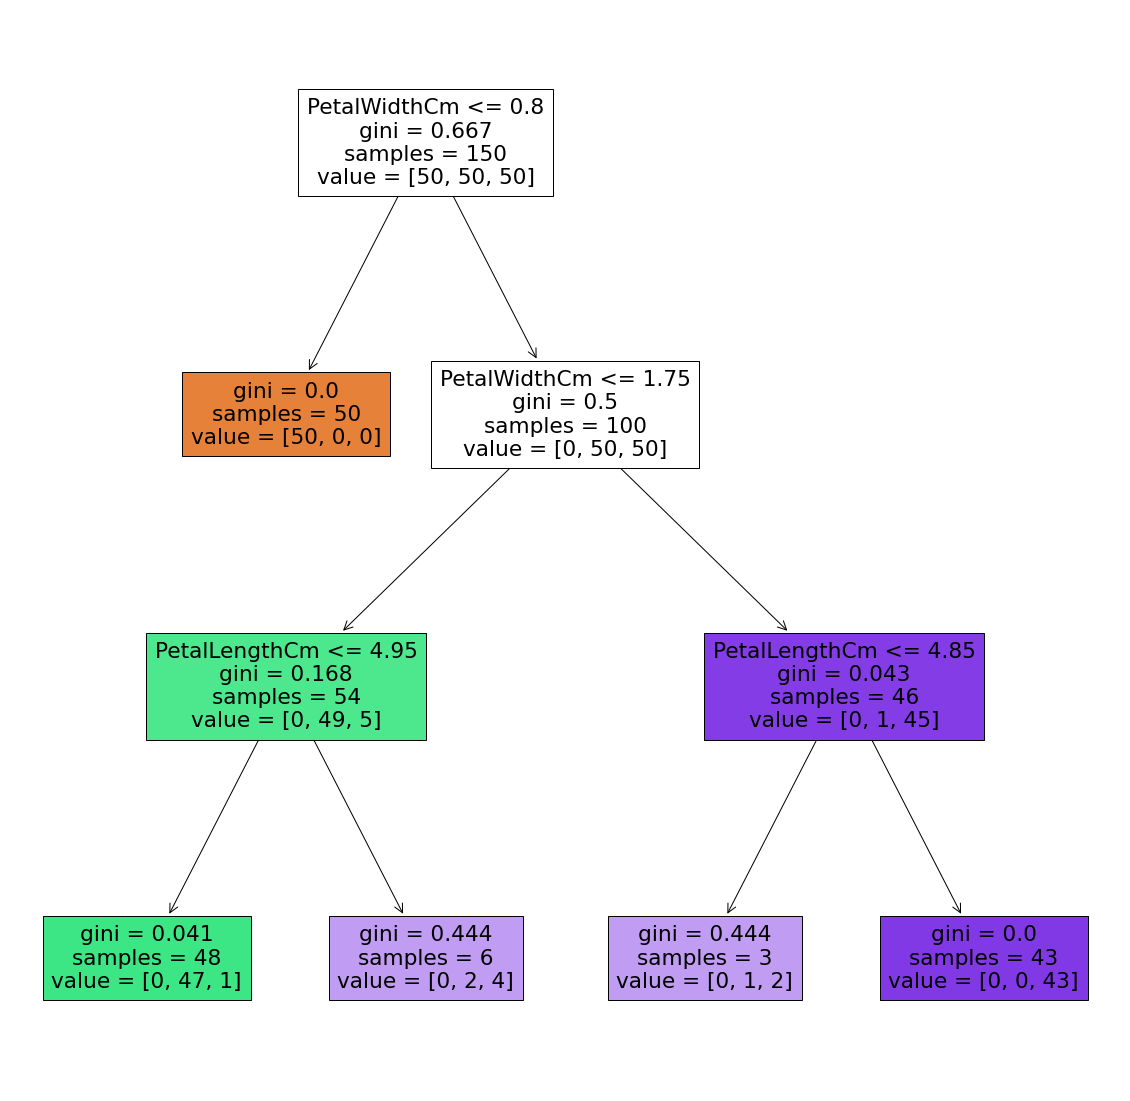

In [21]:
from sklearn import tree
T = tree.DecisionTreeClassifier(max_depth=3) 
T.fit(x, y)
fig, ax = plt.subplots(1, 1, figsize=(20,20))
p = tree.plot_tree(T, filled=True, feature_names=x.columns)

In [22]:
T.score(x, y)

0.9733333333333334

In [23]:
def fit_tree(X, y, d):
    T = tree.DecisionTreeClassifier(max_depth=d)
    T.fit(X, y)
    return T

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [25]:
T2 = fit_tree(X_train, y_train, 2)
train_score = T2.score(X_train, y_train)
test_score = T2.score(X_test, y_test)

print('train score:', train_score)
print('test score:', test_score)

train score: 0.9523809523809523
test score: 0.9777777777777777


In [26]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


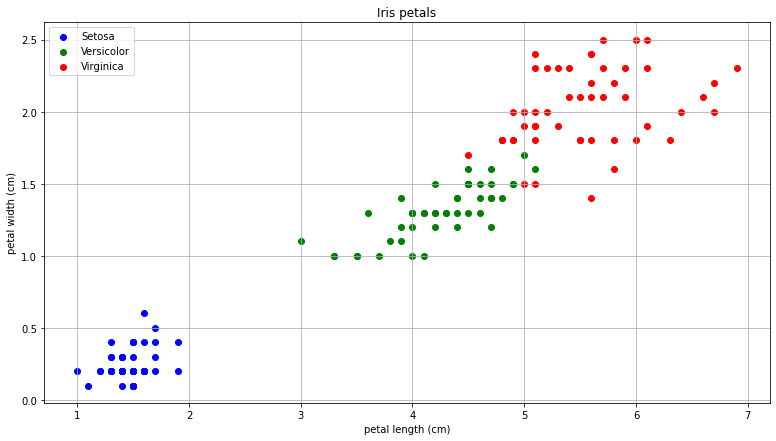

In [27]:
import matplotlib.pyplot as plt

setosa_idx = iris["Species"] == "setosa"
setosa = iris[setosa_idx]
versicolor_idx = iris["Species"]=='versicolor'
versicolor = iris[versicolor_idx]
virginica_idx = iris["Species"] =='virginica'
virginica = iris[virginica_idx]

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa["PetalLengthCm"], setosa["PetalWidthCm"], label="Setosa", facecolor="blue")
ax.scatter(versicolor["PetalLengthCm"], versicolor["PetalWidthCm"], label="Versicolor", facecolor="green")
ax.scatter(virginica["PetalLengthCm"], virginica["PetalWidthCm"], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()


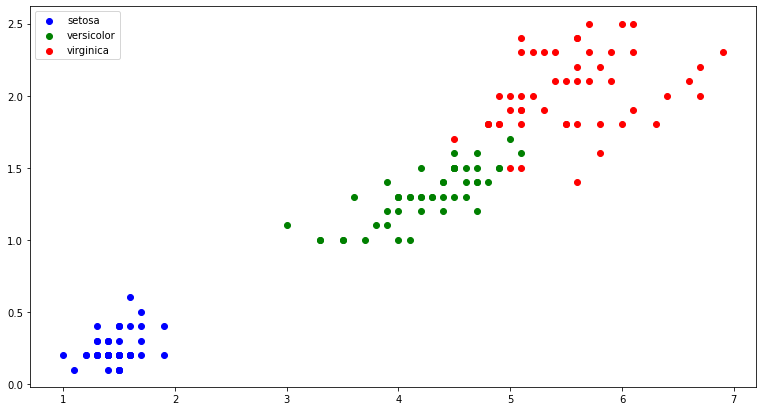

In [28]:
def plot_scatter(x, y, label, colors):
    ax.scatter(x, y, label=label, facecolor=color)
    ax.legend()


#fig, ax = plt.subplots()
#fig.set_size_inches(13, 7) # adjusting the length and width of plot


#plot_scatter(setosa["PetalLengthCm"], setosa["PetalWidthCm"], "Setosa", "blue")
#plot_scatter(versicolor["PetalLengthCm"], versicolor["PetalWidthCm"], "Versicolor", "green")


def plot_scatter_2(x, y, color=["blue", "green", "red"]):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 7) # adjusting the length and width of plot
    
    colors = {"setosa":color[0], "versicolor":color[1], "virginica":color[2]}

    for species, df_species in iris.groupby(["Species"]):
        ax.scatter(df_species[x], df_species[y], label=species, facecolor=colors[species])
        
    ax.legend()

plot_scatter_2("PetalLengthCm","PetalWidthCm")

In [29]:
def bool_idxed_series(col_name, value, condition):
    '''
    Returns a pandas series including the col_name column in the dataframe
    indexed by value
    '''
    if condition == "!=":
        bool_idx = iris[col_name] != value
        new_series = iris[bool_idx]
        return 
    

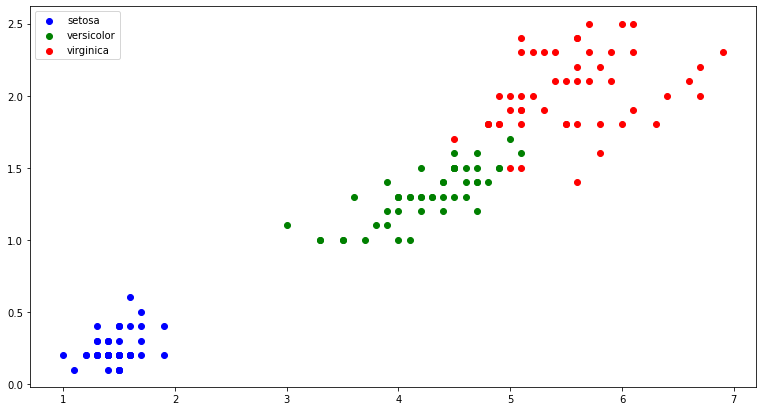

In [30]:
ic.visualize_scatter("PetalLengthCm","PetalWidthCm")

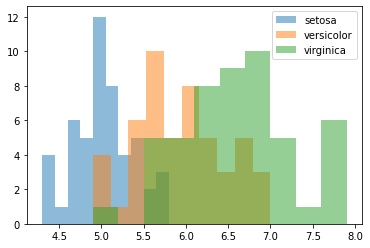

In [31]:
fig, ax = plt.subplots(1, 1)

def plot_hist_sepal_length(df_species):
    species = df_species["Species"].iloc[0]
    ax.hist(df_species["SepalLengthCm"], alpha=0.5, label=species)

iris.groupby("Species").apply(plot_hist_sepal_length)
ax.legend()

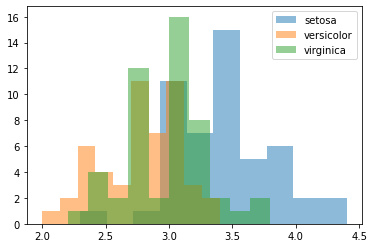

In [32]:
def plot_hist_sepal_w(df_species):
    species = df_species["Species"].iloc[0]
    ax.hist(df_species["SepalWidthCm"], alpha=0.5, label=species)
fig, ax = plt.subplots(1, 1)
iris.groupby("Species").apply(plot_hist_sepal_w)
ax.legend()

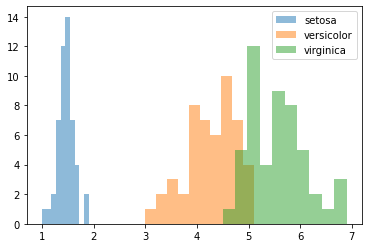

In [33]:
def plot_hist_petal_len(df_species):
    species = df_species["Species"].iloc[0]
    ax.hist(df_species["PetalLengthCm"], alpha=0.5, label=species)
fig, ax = plt.subplots(1, 1)
iris.groupby("Species").apply(plot_hist_petal_len)
ax.legend()

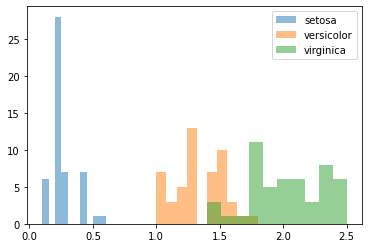

In [34]:
def plot_hist_petal_len(df_species):
    species = df_species["Species"].iloc[0]
    ax.hist(df_species["PetalWidthCm"], alpha=0.5, label=species)
fig, ax = plt.subplots(1, 1)
iris.groupby("Species").apply(plot_hist_petal_len)
ax.legend()

In [35]:
def decision_tree(petal_length,)
    if petal_length <= 2.45 | petal_width <= .75:
        return "Iris-setosa"
    elif PetalWidthCm <= 1.75:
        if PetalLengthCm <= 1.65:
            return "Iris-Virsicolor"
        else:
            return "Iris-Virginica"
    elif Petal
    
        

SyntaxError: invalid syntax (796206306.py, line 1)